# Sample Solution

### 1.Data import and Understanding [ 6 points ]

### a). Read the ‘Signals.csv’ as DataFrame and import required libraries. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization,Dropout

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Signal.csv')

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### b). Check for missing values and print percentage for each attribute.

In [ ]:
df.isna().sum()/len(df)*100

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

### c). Check for presence of duplicate records in the dataset and impute with appropriate method. 

In [ ]:
df.duplicated().sum()

240

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

0

### d). Visualize distribution of the target variable.

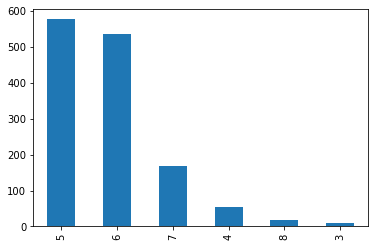

In [ ]:
df.Signal_Strength.value_counts().plot(kind='bar')
plt.show()

### e). Share insights from the initial data analysis (at least 2). 

- Signal strength is biased towards 5 & 6.
- Range of sensors is different for different attributes, hence normalization would be required.

### 2. Data preprocessing [ 6 points ]

### a). Split the data into X & Y.

In [ ]:
X = df.drop('Signal_Strength',axis=1)   # Independent variables
Y = df['Signal_Strength']               # Target variable

### b). Split the data into train & test with 70:30 proportion.

In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

### c). Print shape of all the 4 variables and verify if train and test data is in sync


In [ ]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)


(951, 11)
(951,)
(408, 11)
(408,)


### d). Normalize the train and test data with appropriate method. 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_Train)
X_Train_S = scaler.transform(X_Train)
X_Test_S = scaler.transform(X_Test)

### e). Transform Labels into format acceptable by Neural Network


In [ ]:
Y_Train = pd.get_dummies(Y_Train).values
Y_Test = pd.get_dummies(Y_Test).values

### 3. Model Training & Evaluation using Neural Network [ 8 points ]

### a). Design a Neural Network to train a classifier. 

In [ ]:
NN_model_classifier = Sequential()

# The Input Layer :
NN_model_classifier.add(Dense(11, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='sigmoid'))
NN_model_classifier.add(BatchNormalization())
NN_model_classifier.add(Dense(9,activation='sigmoid'))

# The Output Layer :
NN_model_classifier.add(Dense(6,activation='softmax'))  

# Compile the network :
NN_model_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
Total params: 374
Trainable params: 352
Non-trainable params: 22
_________________________________________________________________


### b). Train the classifier using previously designed Architecture.

In [ ]:
model_train = NN_model_classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=50, batch_size=128)

Epoch 1/50
8/8 [==============================] - 1s 38ms/step - loss: 3.0235 - accuracy: 0.0063 - val_loss: 2.9756 - val_accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 2.9290 - accuracy: 0.0179 - val_loss: 2.9006 - val_accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 2.8386 - accuracy: 0.0557 - val_loss: 2.8283 - val_accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 2.7541 - accuracy: 0.0694 - val_loss: 2.7577 - val_accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 2.6717 - accuracy: 0.0810 - val_loss: 2.6896 - val_accuracy: 0.0000e+00
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 2.5930 - accuracy: 0.0873 - val_loss: 2.6235 - val_accuracy: 0.0000e+00
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 2.5181 - accuracy: 0.0936 - val_loss: 2.5599 - val_accuracy: 0.0000e+00
Epoch

### c). Plot 2 separate visuals. 
- i. Training Loss and Validation Loss
- ii. Training Accuracy and Validation Accuracy

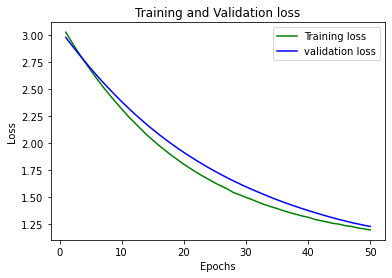

In [ ]:
loss_train = NN_model_classifier.history.history['loss']
loss_val = NN_model_classifier.history.history['val_loss']
epochs = range(1,50+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

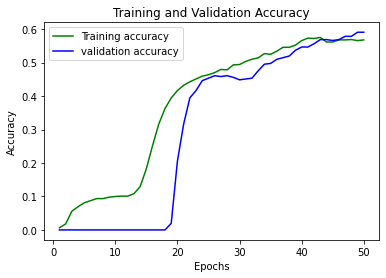

In [ ]:
loss_train = NN_model_classifier.history.history['accuracy']
loss_val = NN_model_classifier.history.history['val_accuracy']
epochs = range(1,50+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### d). Design new architecture/update existing architecture in attempt to improve the performance of the model

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(11, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))
NN_model.add(BatchNormalization())

NN_model.add(Dense(9,activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.15))

# The Output Layer :
NN_model.add(Dense(6,activation='softmax'))  

# Compile the network :
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 batch_normalization_1 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 9)                 108       
                                                                 
 batch_normalization_2 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_5 (Dense)             (None, 9)                

In [ ]:
NN_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model_train = NN_model.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 1s 10ms/step - loss: 2.4585 - accuracy: 0.1535 - val_loss: 2.1584 - val_accuracy: 0.1642
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 2.2142 - accuracy: 0.2355 - val_loss: 2.0934 - val_accuracy: 0.2475
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 2.0468 - accuracy: 0.3165 - val_loss: 2.0216 - val_accuracy: 0.3676
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 1.9402 - accuracy: 0.3817 - val_loss: 1.9476 - val_accuracy: 0.4485
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 1.8470 - accuracy: 0.4238 - val_loss: 1.8772 - val_accuracy: 0.4730
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 1.7331 - accuracy: 0.4711 - val_loss: 1.7950 - val_accuracy: 0.4926
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 1.6517 - accuracy: 0.4942 - val_loss: 1.7082 - val_accuracy: 0.5245
Epoch 8/100


Epoch 59/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9190 - accuracy: 0.6141 - val_loss: 0.9910 - val_accuracy: 0.6078
Epoch 60/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9190 - accuracy: 0.6183 - val_loss: 0.9913 - val_accuracy: 0.6054
Epoch 61/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9181 - accuracy: 0.5973 - val_loss: 0.9864 - val_accuracy: 0.6005
Epoch 62/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9182 - accuracy: 0.6046 - val_loss: 0.9889 - val_accuracy: 0.6152
Epoch 63/100
30/30 [==============================] - 0s 6ms/step - loss: 0.9320 - accuracy: 0.6046 - val_loss: 0.9870 - val_accuracy: 0.6054
Epoch 64/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9241 - accuracy: 0.6215 - val_loss: 0.9761 - val_accuracy: 0.6225
Epoch 65/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9339 - accuracy: 0.5910 - val_loss: 0.9764 - val_accuracy: 0.6225
Epoch 

### e). Plot visuals as in Q3.C and share insights about difference observed in both the models. 

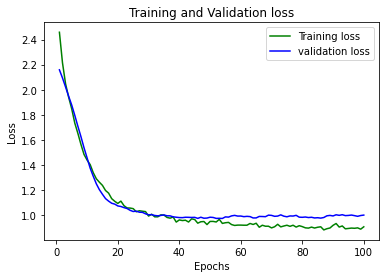

In [ ]:
loss_train = NN_model.history.history['loss']
loss_val = NN_model.history.history['val_loss']
epochs = range(1,100+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

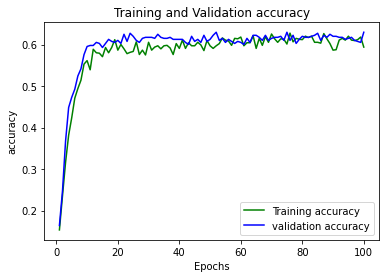

In [ ]:
Acc_train = NN_model.history.history['accuracy']
Acc_val = NN_model.history.history['val_accuracy']
epochs = range(1,100+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

- Loss in both training and testing data is gradual with batch size 128 whereas slope is steeper with batch size 32. 
- Accuracy improved by ~3% when additional hidden layer is introduced along with dropout.

### Happy Learning :)